In [63]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt 
import seaborn as sns

load_dotenv()

DB_URL = os.getenv("DATABASE_URL")

engine = create_engine(DB_URL)


df = pd.read_sql("SELECT * FROM weather_data", engine)
df.head()


,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
0,1,Ahmedabad,2025-11-15 18:46:38.567400+00:00,20.2,46.0,3.500000,35.85,34.75,26.85,72.0
1,2,Bengaluru,2025-11-15 18:46:38.376559+00:00,20.2,88.0,2.888889,44.85,43.15,36.95,53.0
2,3,Bhopal,2025-11-15 18:46:38.737303+00:00,18.0,28.0,2.000000,56.95,50.35,20.45,76.0
3,4,Chennai,2025-11-15 18:46:38.355079+00:00,27.0,84.0,5.611111,59.25,50.05,8.05,113.0
4,5,Dehradun,2025-11-15 18:46:38.785387+00:00,11.4,55.0,2.194444,53.05,51.85,34.55,105.0


In [64]:
df['timestamp'] = df['timestamp'].dt.tz_convert('Asia/Kolkata')

In [65]:
df.head()

,id,city,timestamp,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
0,1,Ahmedabad,2025-11-16 00:16:38.567400+05:30,20.2,46.0,3.500000,35.85,34.75,26.85,72.0
1,2,Bengaluru,2025-11-16 00:16:38.376559+05:30,20.2,88.0,2.888889,44.85,43.15,36.95,53.0
2,3,Bhopal,2025-11-16 00:16:38.737303+05:30,18.0,28.0,2.000000,56.95,50.35,20.45,76.0
3,4,Chennai,2025-11-16 00:16:38.355079+05:30,27.0,84.0,5.611111,59.25,50.05,8.05,113.0
4,5,Dehradun,2025-11-16 00:16:38.785387+05:30,11.4,55.0,2.194444,53.05,51.85,34.55,105.0


In [66]:
df.describe()

,id,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,135.500000,21.776667,50.533333,3.000206,62.707037,58.652593,20.829630,95.840741
std,78.086491,5.281427,21.084641,1.562362,28.116140,27.175751,15.210652,50.672436
min,1.000000,10.700000,15.000000,1.000000,17.950000,17.650000,0.850000,5.000000
25%,68.250000,17.550000,33.250000,2.000000,44.850000,40.525000,8.050000,57.000000
50%,135.500000,22.300000,46.000000,2.805556,56.200000,51.650000,18.950000,76.500000
75%,202.750000,26.200000,68.000000,3.500000,72.875000,67.650000,31.900000,131.000000
max,270.000000,33.400000,100.000000,9.000000,149.350000,145.250000,63.650000,262.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype                       
---  ------            --------------  -----                       
 0   id                270 non-null    int64                       
 1   city              270 non-null    object                      
 2   timestamp         270 non-null    datetime64[ns, Asia/Kolkata]
 3   temperature       270 non-null    float64                     
 4   humidity          270 non-null    float64                     
 5   wind_speed        270 non-null    float64                     
 6   pm10              270 non-null    float64                     
 7   pm2_5             270 non-null    float64                     
 8   nitrogen_dioxide  270 non-null    float64                     
 9   ozone             270 non-null    float64                     
dtypes: datetime64[ns, Asia/Kolkata](1), float64(7), int64(1), object(1)
memory

In [68]:
df.isnull().sum()

id                  0
city                0
timestamp           0
temperature         0
humidity            0
wind_speed          0
pm10                0
pm2_5               0
nitrogen_dioxide    0
ozone               0
dtype: int64

In [69]:
numeric_cols = ["temperature","humidity","wind_speed","pm10","pm2_5","nitrogen_dioxide","ozone"]

df[numeric_cols] = df.groupby("city")[numeric_cols].transform(
    lambda x: x.interpolate(method="linear", limit_direction="both")
)

In [70]:
df.isnull().sum()

id                  0
city                0
timestamp           0
temperature         0
humidity            0
wind_speed          0
pm10                0
pm2_5               0
nitrogen_dioxide    0
ozone               0
dtype: int64

In [71]:
df.nunique()

id                  270
city                 15
timestamp           270
temperature         115
humidity             67
wind_speed           53
pm10                204
pm2_5               201
nitrogen_dioxide    191
ozone               136
dtype: int64

In [72]:
df_min_pm10 = pd.read_sql("""
SELECT city , MIN(pm10) AS min_pm10
FROM weather_data
GROUP BY city
ORDER BY min_pm10
LIMIT 5
""", engine)


In [73]:
df_max_pm10 = pd.read_sql("""
SELECT city , Max(pm10) AS max_pm10
FROM weather_data
GROUP BY city
ORDER BY max_pm10 DESC
LIMIT 5
""", engine)

In [74]:
df_max_pm2_5 = pd.read_sql("""
SELECT city , MAX(pm2_5) AS max_pm2_5
FROM weather_data
GROUP BY city
ORDER BY max_pm2_5 DESC
LIMIT 5
""", engine)


In [75]:
df_min_pm2_5 = pd.read_sql("""
SELECT city , MIN(pm2_5) AS min_pm2_5
FROM weather_data
GROUP BY city
ORDER BY min_pm2_5
LIMIT 5
""", engine)


In [76]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.corr()

,id,temperature,humidity,wind_speed,pm10,pm2_5,nitrogen_dioxide,ozone
id,1.000000,0.567158,-0.463017,0.108402,-0.223952,-0.224769,-0.678988,0.620613
temperature,0.567158,1.000000,-0.437050,0.474646,-0.105234,-0.101910,-0.477037,0.450801
humidity,-0.463017,-0.437050,1.000000,0.168735,0.285994,0.261759,0.251654,-0.176777
wind_speed,0.108402,0.474646,0.168735,1.000000,-0.167476,-0.188530,-0.363928,0.190078
pm10,-0.223952,-0.105234,0.285994,-0.167476,1.000000,0.995513,0.452362,-0.200519
pm2_5,-0.224769,-0.101910,0.261759,-0.188530,0.995513,1.000000,0.470734,-0.213937
nitrogen_dioxide,-0.678988,-0.477037,0.251654,-0.363928,0.452362,0.470734,1.000000,-0.685323
ozone,0.620613,0.450801,-0.176777,0.190078,-0.200519,-0.213937,-0.685323,1.000000


# "Correlation between different variables"

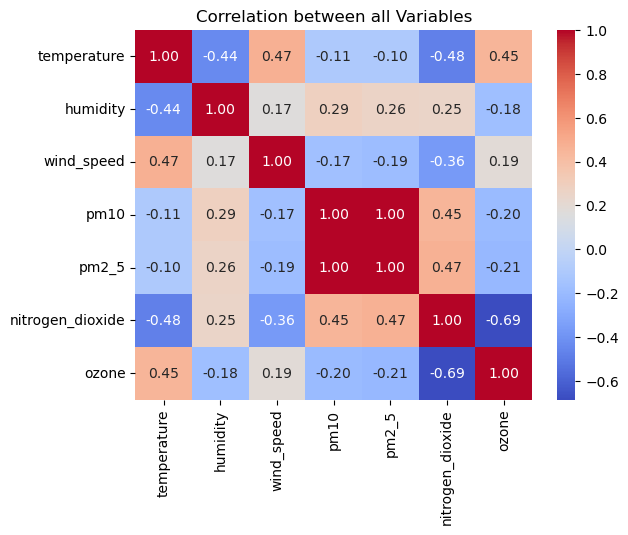

In [77]:
num_columns = ['temperature','humidity','wind_speed','pm10','pm2_5','nitrogen_dioxide','ozone']

sns.heatmap(df[num_columns].corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation between all Variables')
plt.show()


# "Boxplot of all Numeric Columns"

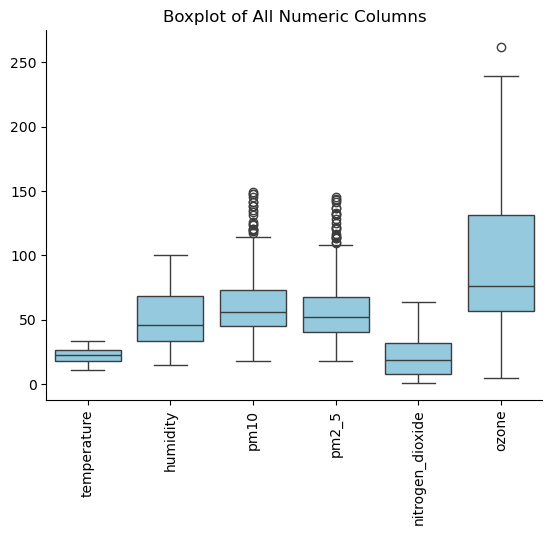

In [78]:
num_columns = ['temperature','humidity','pm10','pm2_5','nitrogen_dioxide','ozone']

sns.boxplot(data=df[num_columns],color='skyblue')
plt.xticks(rotation=90)
plt.title('Boxplot of All Numeric Columns')
sns.despine()
plt.show()

# "MIN & MAX PM10 AND PM2.5"

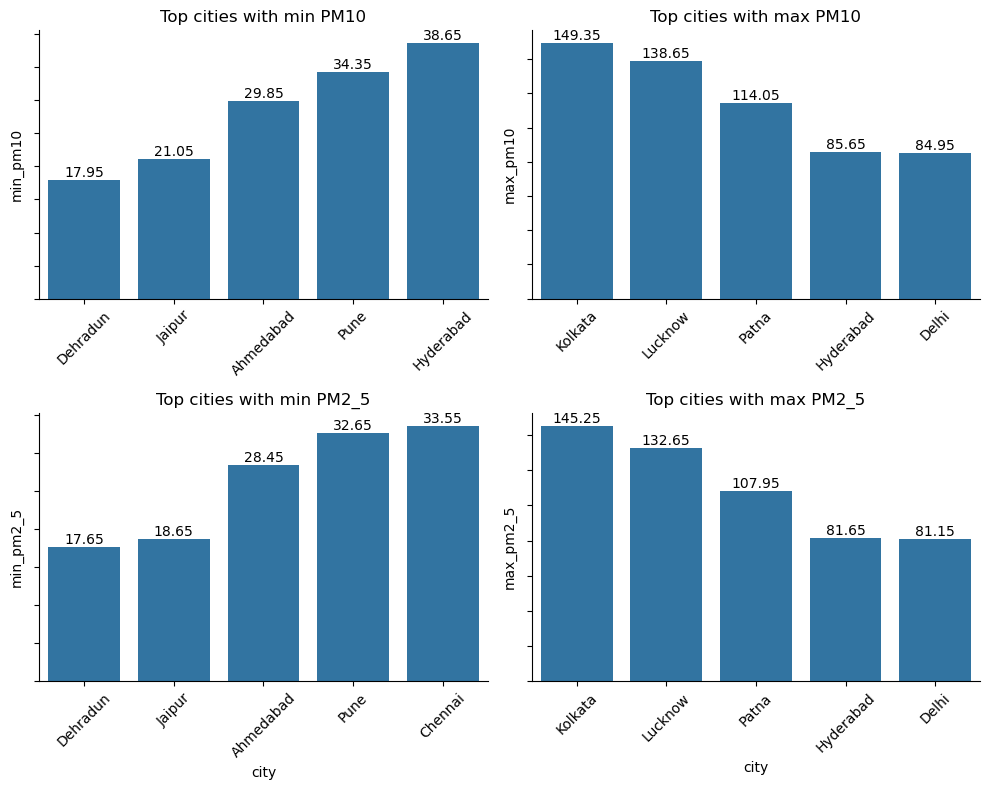

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.barplot(data=df_min_pm10, x='city',y='min_pm10', ax=axes[0,0])
axes[0,0].set_title("Top cities with min PM10")
axes[0,0].bar_label(axes[0,0].containers[0])

sns.barplot(data=df_max_pm10, x='city',y='max_pm10', ax=axes[0,1])
axes[0,1].set_title("Top cities with max PM10")
axes[0,1].bar_label(axes[0,1].containers[0])

sns.barplot(data=df_min_pm2_5, x='city',y='min_pm2_5', ax=axes[1,0])
axes[1,0].set_title("Top cities with min PM2_5")
axes[1,0].bar_label(axes[1,0].containers[0])

sns.barplot(data=df_max_pm2_5, x='city',y='max_pm2_5', ax=axes[1,1])
axes[1,1].set_title("Top cities with max PM2_5")
axes[1,1].bar_label(axes[1,1].containers[0])

for ax in axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

for ax in axes.flat:
    ax.set_yticklabels([])   # removes numbers

for ax in axes[0]:
    ax.set_xlabel('')

sns.despine()
plt.tight_layout()
plt.show()

In [80]:
df_avg_temp = pd.read_sql("""
SELECT
    city,
    ROUND(AVG(temperature)::numeric) AS avg_temp
FROM weather_data
GROUP BY city
ORDER BY avg_temp DESC
LIMIT 10""", engine)


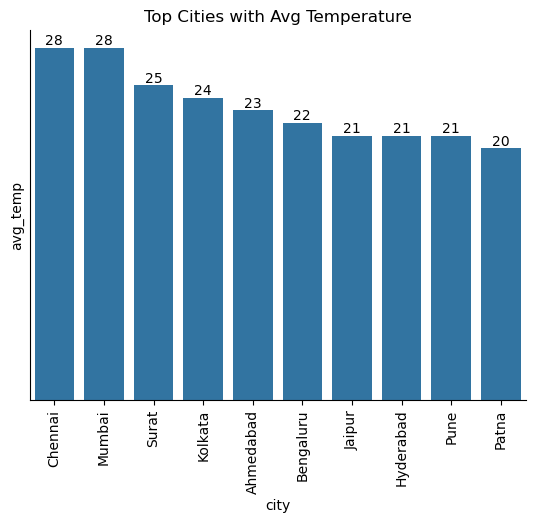

In [81]:
ax = sns.barplot(df_avg_temp, x='city', y='avg_temp')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
ax.set_yticks([])
plt.title("Top Cities with Avg Temperature")
sns.despine()
plt.show()

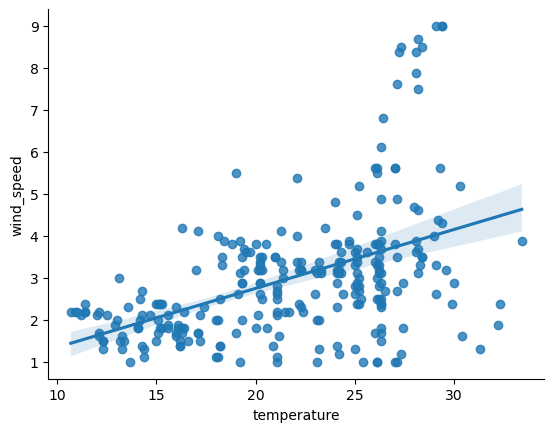

In [82]:
sns.regplot(x='temperature', y='wind_speed', data=df)
sns.despine()

<Axes: xlabel='temperature', ylabel='ozone'>

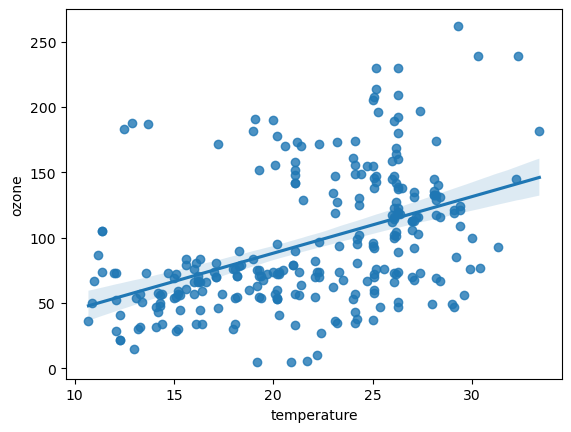

In [85]:
sns.regplot(data=df,x='temperature', y='ozone')